# Analyze the home price by regression

### 1) Select the feature quantity for practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 150) # columns
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.offline as offline
# offline.init_notebook_mode()

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
columns_train = ["GrLivArea", "YearBuilt", "SalePrice"]
df_anls = df_train.loc[:, columns_train]
df_anls.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [5]:
df_anls.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [6]:
df_anls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [7]:

df_anls.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


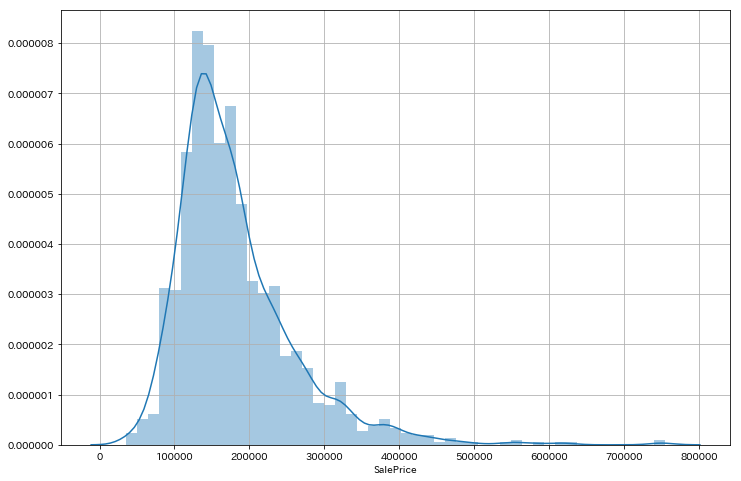

In [8]:
# plot hist
fig = plt.figure(figsize=(12, 8))

plt.grid()

sns.distplot(df_anls['SalePrice'])

### 2) Pipeline of regression

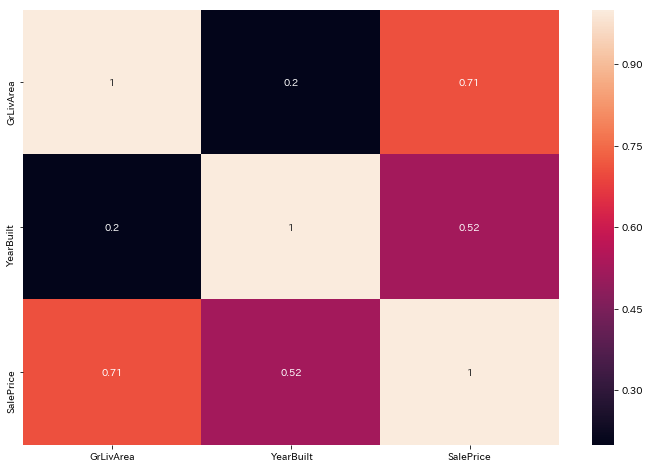

In [9]:
fig = plt.figure(figsize=(12, 8))

correlation_matrix = np.corrcoef(df_anls.transpose())

sns.heatmap(correlation_matrix, annot=True,
            xticklabels=columns_train,
            yticklabels=columns_train)

plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# define X and y
X = df_anls.iloc[:, :2]
y = df_anls['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [11]:
from sklearn.preprocessing import StandardScaler
# standalized
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Logarithmic
y_train = np.log(y_train)

In [12]:
# import for LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
model_LR = LinearRegression()
reg = model_LR.fit(X_train_std, y_train)

# Inverse logarithmic conversion
y_pred = np.exp(model_LR.predict(X_test_std))

# R**2
reg.score(X_train_std, y_train)

0.6942838723446799

In [14]:
reg.coef_

array([0.24600541, 0.18635515])

In [15]:
reg.intercept_ 

12.035571511437952

In [16]:
# Mean Squared Error, MSE
from sklearn.metrics import mean_squared_error

df_train_error = mean_squared_error(y_test,y_pred)
df_train_error

1615695508.8223348

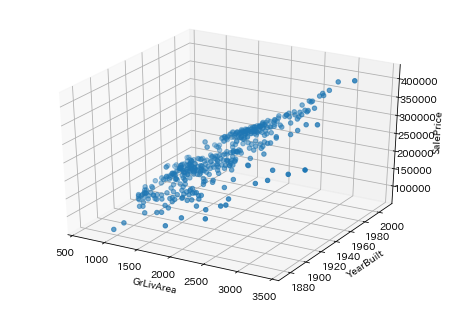

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# intialize
fig = plt.figure()
ax = Axes3D(fig)

# generate axis
ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

# change type of data
x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

# vidualization
ax.scatter3D(x1, x2, y_pred)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


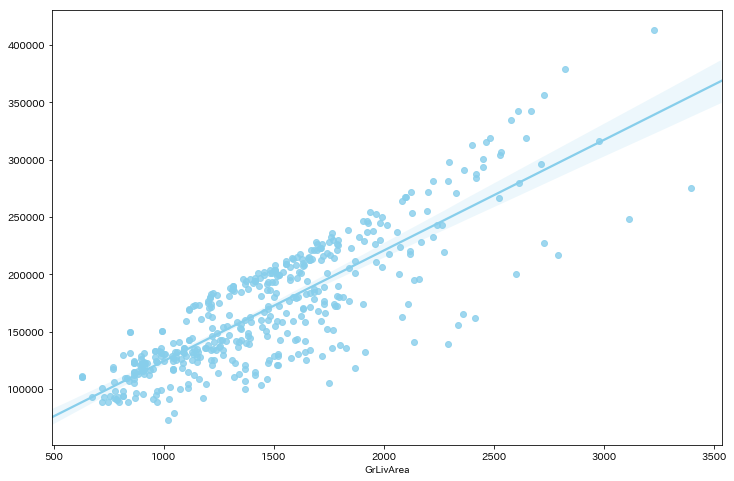

In [36]:
# vidualize "GrLivArea" --> "SalePrice"
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=x1, y=y_pred, color='skyblue')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


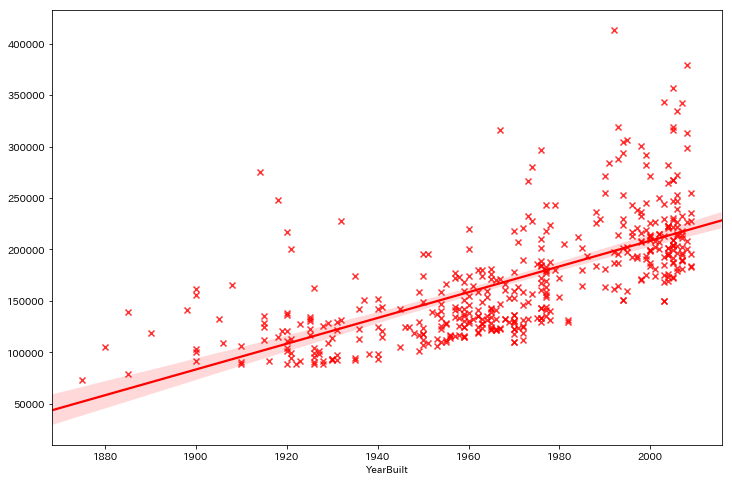

In [39]:
# vidualize ""YearBuilt" --> "SalePrice"
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=x2, y=y_pred, color='red', marker='x')

### 3) Compare methods

In [59]:
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

"""

get scores: accuracy, pecision, recall, F measure

"""
def get_scores(y_test, y_pred):
    scores_array = np.hstack((accuracy_score(y_test, y_pred), 
                             precision_score(y_test, y_pred),
                             recall_score(y_test, y_pred),
                             f1_score(y_test, y_pred)))
    return scores_array

In [45]:
get_scores(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

線形回帰
SVM
決定木
ランダムフォレスト

### 4) Advance task/ Meaning of each parameter